# AI - Project 02- Mohsen Fayyaz - 810196650

<ul>
    <li><b>Minimax:</b><br>
        <ul>
            <li>
                Minimax is a decision rule used in artificial intelligence, decision theory, game theory, statistics and philosophy for minimizing the possible loss for a worst case scenario. When dealing with gains, it is referred to as "maximin"—to maximize the minimum gain.
            </li>
            <li>
                The game we are modeling is a zero sum game. Because the maximum points in the end is 1 and the player that can't move will get 0 and the winner gets one.<br>
                So each player is trying to maximize it's points and minimize it's opponent's
            </li>
            <li>
                In the context of zero-sum games, the minimax theorem is equivalent to:
                <br>
    For every two-person, zero-sum game with finitely many strategies, there exists a value V and a mixed strategy for each player, such that<br>
        (a) Given player 2's strategy, the best payoff possible for player 1 is V, and <br>
        (b) Given player 1's strategy, the best payoff possible for player 2 is −V. <br>
Equivalently, Player 1's strategy guarantees them a payoff of V regardless of Player 2's strategy, and similarly Player 2 can guarantee themselves a payoff of −V. The name minimax arises because each player minimizes the maximum payoff possible for the other—since the game is zero-sum, they also minimize their own maximum loss (i.e. maximize their minimum payoff)
            </li>
        </ul>
    </li>
</ul>

<img src="https://image.slidesharecdn.com/gameplayinginatrifiialintelligence-090406023741-phpapp02/95/game-playing-in-artificial-intelligence-19-728.jpg?cb=1238985506" />

## Pseudo code:

## Game.py

In [7]:
import random
import copy


class GameError(AttributeError):
    pass


class Game:

    def __init__(self, n):
        self.size = n
        self.half_the_size = int(n / 2)
        self.reset()

    def reset(self):
        self.board = []
        value = 'B'
        for i in range(self.size):
            row = []
            for j in range(self.size):
                row.append(value)
                value = self.opponent(value)
            self.board.append(row)
            if self.size % 2 == 0:
                value = self.opponent(value)

    def __str__(self):
        result = "  "
        for i in range(self.size):
            result += str(i) + " "
        result += "\n"
        for i in range(self.size):
            result += str(i) + " "
            for j in range(self.size):
                result += str(self.board[i][j]) + " "
            result += "\n"
        return result

    def valid(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size

    def contains(self, board, row, col, symbol):
        return self.valid(row, col) and board[row][col] == symbol

    def countSymbol(self, board, symbol):
        count = 0
        for r in range(self.size):
            for c in range(self.size):
                if board[r][c] == symbol:
                    count += 1
        return count

    def opponent(self, player):
        if player == 'B':
            return 'W'
        else:
            return 'B'

    def distance(self, r1, c1, r2, c2):
        return abs(r1 - r2 + c1 - c2)

    def makeMove(self, player, move):
        self.board = self.nextBoard(self.board, player, move)

    def nextBoard(self, board, player, move):
        r1 = move[0]
        c1 = move[1]
        r2 = move[2]
        c2 = move[3]
        next = copy.deepcopy(board)
        if not (self.valid(r1, c1) and self.valid(r2, c2)):
            raise GameError
        if next[r1][c1] != player:
            raise GameError
        dist = self.distance(r1, c1, r2, c2)
        if dist == 0:
            if self.openingMove(board):
                next[r1][c1] = "."
                return next
            raise GameError
        if next[r2][c2] != ".":
            raise GameError
        jumps = int(dist / 2)
        dr = int((r2 - r1) / dist)
        dc = int((c2 - c1) / dist)
        for i in range(jumps):
            if next[r1 + dr][c1 + dc] != self.opponent(player):
                raise GameError
            next[r1][c1] = "."
            next[r1 + dr][c1 + dc] = "."
            r1 += 2 * dr
            c1 += 2 * dc
            next[r1][c1] = player
        return next

    def openingMove(self, board):
        return self.countSymbol(board, ".") <= 1

    def generateFirstMoves(self, board):
        moves = []
        moves.append([0] * 4)
        moves.append([self.size - 1] * 4)
        moves.append([self.half_the_size] * 4)
        moves.append([self.half_the_size - 1] * 4)
        return moves

    def generateSecondMoves(self, board):
        moves = []
        if board[0][0] == ".":
            moves.append([0, 1] * 2)
            moves.append([1, 0] * 2)
            return moves
        elif board[self.size - 1][self.size - 1] == ".":
            moves.append([self.size - 1, self.size - 2] * 2)
            moves.append([self.size - 2, self.size - 1] * 2)
            return moves
        elif board[self.half_the_size - 1][self.half_the_size - 1] == ".":
            pos = self.half_the_size - 1
        else:
            pos = self.half_the_size
        moves.append([pos, pos - 1] * 2)
        moves.append([pos + 1, pos] * 2)
        moves.append([pos, pos + 1] * 2)
        moves.append([pos - 1, pos] * 2)
        return moves

    def check(self, board, r, c, rd, cd, factor, opponent):
        if self.contains(board, r + factor * rd, c + factor * cd, opponent) and \
                self.contains(board, r + (factor + 1) * rd, c + (factor + 1) * cd, '.'):
            return [[r, c, r + (factor + 1) * rd, c + (factor + 1) * cd]] + \
                   self.check(board, r, c, rd, cd, factor + 2, opponent)
        else:
            return []

    def generateMoves(self, board, player):
        if self.openingMove(board):
            if player == 'B':
                return self.generateFirstMoves(board)
            else:
                return self.generateSecondMoves(board)
        else:
            moves = []
            rd = [-1, 0, 1, 0]
            cd = [0, 1, 0, -1]
            for r in range(self.size):
                for c in range(self.size):
                    if board[r][c] == player:
                        for i in range(len(rd)):
                            moves += self.check(board, r, c, rd[i], cd[i], 1,
                                                self.opponent(player))
            return moves

    def playOneGame(self, p1, p2, show):
        self.reset()
        while True:
            if show:
                print(self)
                print("player B's turn")
            move = p1.getMove(self.board)
            if move == []:
                print("Game over")
                return 'W'
            try:
                self.makeMove('B', move)
            except GameError:
                print("Game over: Invalid move by", p1.name)
                print(move)
                print(self)
                return 'W'
            if show:
                print(move)
                print(self)
                print("player W's turn")
            move = p2.getMove(self.board)
            if move == []:
                print("Game over")
                return 'B'
            try:
                self.makeMove('W', move)
            except GameError:
                print("Game over: Invalid move by", p2.name)
                print(move)
                print(self)
                return 'B'
            if show:
                print(move)

    def playNGames(self, n, p1, p2, show):
        first = p1
        second = p2
        for i in range(n):
            print("Game", i)
            winner = self.playOneGame(first, second, show)
            if winner == 'B':
                first.won()
                second.lost()
                print(first.name, "wins")
            else:
                first.lost()
                second.won()
                print(second.name, "wins")
            first, second = second, first


class Player:
    name = "Player"
    wins = 0
    losses = 0

    def results(self):
        result = self.name
        result += " Wins:" + str(self.wins)
        result += " Losses:" + str(self.losses)
        return result

    def lost(self):
        self.losses += 1

    def won(self):
        self.wins += 1

    def reset(self):
        self.wins = 0
        self.losses = 0

    def initialize(self, side):
        abstract()

    def getMove(self, board):
        abstract()


class SimplePlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Simple"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            return moves[0]


class RandomPlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Random"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            return moves[random.randrange(0, n)]


class HumanPlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Human"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        while True:
            print("Possible moves:", moves)
            n = len(moves)
            if n == 0:
                print("You must concede")
                return []
            index = input("Enter index of chosen move (0-" + str(n - 1) +
                          ") or -1 to concede: ")
            try:
                index = int(index)
                if index == -1:
                    return []
                if 0 <= index <= (n - 1):
                    print("returning", moves[index])
                    return moves[index]
                else:
                    print("Invalid choice, try again.")
            except Exception as e:
                print("Invalid choice, try again.")


# if __name__ == '__main__':
#     game = Game(8)
#     human1 = HumanPlayer(8)
#     human1.initialize('B')
#     human2 = HumanPlayer(8)
#     human2.initialize('W')
#     game.playOneGame(human1, human2, True)

# Minimax Player without pruning

As shown below, at first I initiate the player and it's parents and set the max depth to observe, in the constructor.
Then the minimax function, based on the current side which is being passed to it, iterates on the possible moves, and decides to return the minimum or maximum of the iterated moves.<br>
The termination condition of the recursion is when the current depth reaches the maximum depth determined in the constructor. At this point I return the evaluation function of that board.

## Minimax Player without pruning implementation:

In [26]:
import random
import time
from copy import deepcopy
from os import system, name
from IPython.core.display import clear_output
import numpy as np

class MinimaxPlayer(Game, Player):
    def __init__(self, n, maxDepth=3):
        super().__init__(n)
        self.maxDepth = maxDepth-1  # 0 based

    def initialize(self, side):
        self.side = side
        self.name = "MINIMAX"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            start = time.time()
            bestMove = self.minimax(board, self.side)
            end = time.time()
            cls()
            print("Turn Time: " + str(end - start))
            return bestMove

    def evaluateFunction(self, board):
        return len(self.generateMoves(board, self.side)) - len(self.generateMoves(board, self.opponent(self.side)))

    def minimax(self, board, currentSide, depth=0):
        moves = self.generateMoves(board, currentSide)
        if depth > self.maxDepth or len(moves) == 0:
            return self.evaluateFunction(board)

        if currentSide == self.side:  # MAXIMIZE
            maxAlpha = -np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1)
                if moveValue > maxAlpha:
                    maxAlpha = moveValue
                    bestMove = move

            if depth == 0:
                return bestMove
            else:
                return maxAlpha

        else:  # MINIMIZE
            minBeta = np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1)
                if moveValue < minBeta:
                    minBeta = moveValue

            return minBeta


def cls():
    # for windows
    if name == 'nt':
        _ = system('cls')

        # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')
    clear_output(wait=True)



# Minimax Player with pruning

This Algorithm is the same as above, except that I pass the best value we can get in a branch for maximizing as alpha, and for minimizing as beta.<br>
alpha and beta will be initiated as optional arguments as follows:<br>
$$
    \left\{\begin{array}{lr}
    Alpha = -\infty \\
    Beta  = +\infty \\
    \end{array}\right\}
$$<br>
So if we are in a maximizing state and we see a state in the iteration on possible moves, which gives us a score more than the **beta**, it means the minimizing ancestors of this maximizing state will never use this state's value because they had a less scoring child before. <br>
This is how pruning works for maximizing states and vice versa. <br>

## Minimax Player with pruning implementation:

In [27]:
import random
import time
from copy import deepcopy
from os import system, name
from IPython.core.display import clear_output
import numpy as np

class MinimaxPrunedPlayer(Game, Player):
    def __init__(self, n, maxDepth=4):
        super().__init__(n)
        self.maxDepth = maxDepth-1  # 0 based

    def initialize(self, side):
        self.side = side
        self.name = "MINIMAX"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            start = time.time()
            bestMove = self.minimax(board, self.side)
            end = time.time()
            cls()
            print("Turn Time: " + str(end - start))
            return bestMove

    def evaluateFunction(self, board):
        return len(self.generateMoves(board, self.side)) - len(self.generateMoves(board, self.opponent(self.side)))

    def minimax(self, board, currentSide, depth=0, alpha=-np.inf, beta=np.inf):
        moves = self.generateMoves(board, currentSide)
        if depth > self.maxDepth or len(moves) == 0:
            return self.evaluateFunction(board)

        if currentSide == self.side:  # MAXIMIZE
            maxAlpha = -np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1, alpha, beta)
                if moveValue > beta:
                    return moveValue
                if moveValue > maxAlpha:
                    maxAlpha = moveValue
                    bestMove = move
                    alpha = max(alpha, maxAlpha)
            # print("Max ", depth, moveValue, maxAlpha)
            if depth == 0:
                return bestMove
            else:
                return maxAlpha

        else:  # MINIMIZE
            minBeta = np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1, alpha, beta)
                if moveValue < alpha:
                    return moveValue
                if moveValue < minBeta:
                    minBeta = moveValue
                    beta = min(beta, minBeta)
            # print("Min ", depth, moveValue, minBeta)
            return minBeta


def cls():
    # for windows
    if name == 'nt':
        _ = system('cls')
        # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')
    clear_output(wait=True)


In [29]:
import time

if __name__ == '__main__':
    game = Game(8)
    # human1 = HumanPlayer(8)
    # human1.initialize('B')
    # human2 = HumanPlayer(8)
    # human2.initialize('W')

#     p2 = RandomPlayer(8)
#     p2.initialize('W')

#     p2 = SimplePlayer(8)
#     p2.initialize('W')

    p2 = MinimaxPlayer(8, 3)
    p2.initialize('W')


    # p1 = MinimaxPlayer(8)
    # p1.initialize('B')
    p1 = MinimaxPrunedPlayer(8, 3)
    p1.initialize('B')

    start = time.time()
    game.playOneGame(p1, p2, True)
    end = time.time()

    print("Overal Time: ", end - start)

Turn Time: 0.008005380630493164
[7, 0, 5, 0]
  0 1 2 3 4 5 6 7 
0 . W . . . . . W 
1 . . W . . B . B 
2 . . . W . . . . 
3 . . W . . . . B 
4 . . . . B . . . 
5 W . . . . . . B 
6 . . . . . . B W 
7 . . . B . B W B 

player B's turn
Game over
Overal Time:  6.2179083824157715


# Evaluation Function)

<ul>
    <li>
        I chose the number of possible moves for the player.<br>
        It is rational because the more possible moves a player has, the better chance he has to win the whole game.
        <br>
        For optimizing the time and number of states explored in this method, I save a number beside the explored state, which is the best depth that one branch of DFS could get into that state with.
        <br>
        This way, branches of DFS won't expand in states that have been expanded before with shorter or equal path lengths to that point.
        <br>
        This method advantage is it's memory. It can be changed in the code where it is mentioned, but smaller memory will slow down the IDS algorithm in a way that we would need minutes to finish each one of the tests.
        <br>
        There are three different memory sizes we can have in my code.
        <br>
        <ol>
            <li>
                The first one which is the best in memory has been explained above.
            </li>
            <li>
                The second one is to just use the memory, proportional to all the states in one level of IDS, which will stop branches in a DFS in a specific max level from going to an explored state unless they have fewer steps to that state.
            </li>
            <li>
                The third one is using a stack which size would be at most the length of the longest branch.
        This approch will minimize used memory but it will have very long execution time which can't be even reported.
            </li>
        </ol>
    </li>
</ul>



## IDS implementation:

In [38]:
class IDS:
    def __init__(self, pac_map):
        self.start_state = State(pac_map, None)

        self.all_explored_states_hash = set()
        self.all_explored_states_hash_best_depth = dict()

        self.one_DFS_explored_states_hash = set()
        self.one_DFS_explored_states_hash_best_depth = dict()

        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        self.goal_state = None
        self.goal_state_is_found = False

        self.hash_maps_to_food_number = dict()

    def init_attributes(self):
        self.goal_state_is_found = False
        self.one_DFS_explored_states_hash = set()
        self.one_DFS_explored_states_hash_best_depth = dict()
        # self.unique_states_hash = set()
        # self.num_of_explored_states = 0
        # self.num_of_unique_explored_states = 0

    def count_explored_state(self, state):
        self.num_of_explored_states += 1;
        if state.get_hash() not in self.unique_states_hash:
            self.unique_states_hash.add(state.get_hash())
            self.num_of_unique_explored_states += 1

    def DFS(self, state, max_depth, current_depth=0, explored=list()):
        self.count_explored_state(state)

        if current_depth >= max_depth:
            return False

        if self.are_constraints_satisfied(state):
            self.goal_state_is_found = True
            self.goal_state = state
            return True

        if state.get_hash() in explored:
            return False

        # < COMMENT FOR MEMORY OF the neighbors of a single path through the search tree

        # CAN'T GO TO AN EXPLORED STATE IN THIS DFS LEVEL UNLESS WITH SMALLER DEPTH
        if state.get_hash() in self.one_DFS_explored_states_hash and \
                current_depth >= self.one_DFS_explored_states_hash_best_depth[state.get_hash()]:
            return False

        # CAN'T GO TO AN EXPLORED STATE IN ALL DFS LEVELS UNLESS WITH SMALLER OR EQUAL DEPTH
        if state.get_hash() in self.all_explored_states_hash and \
                current_depth > self.all_explored_states_hash_best_depth[state.get_hash()]:
            return False

        self.all_explored_states_hash.add(state.get_hash())
        self.all_explored_states_hash_best_depth[state.get_hash()] = current_depth
        self.one_DFS_explored_states_hash.add(state.get_hash())
        self.one_DFS_explored_states_hash_best_depth[state.get_hash()] = current_depth

        # COMMENT FOR MEMORY OF the neighbors of a single path through the search tree />

        explored.append(state.get_hash())

        pac_map = state.get_map()
        p_row, p_col = Pac_map_handler.find_in_map(pac_map, P_CHAR)
        q_row, q_col = Pac_map_handler.find_in_map(pac_map, Q_CHAR)

        # P -------
        new_map = Pac_map_handler.move_p_left(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_down(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_up(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_p_right(copy.deepcopy(pac_map), p_row, p_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        # Q -------------
        new_map = Pac_map_handler.move_q_left(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_right(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_up(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        new_map = Pac_map_handler.move_q_down(copy.deepcopy(pac_map), q_row, q_col)
        new_state = State(new_map, state)
        if self.DFS(new_state, max_depth, current_depth + 1):
            return True

        explored.pop()
        return False

    def start(self):
        ids_max_depth = 0
        self.all_explored_states_hash = set()
        self.all_explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        print("Current IDS Depth:", end=" ");
        while True:
            ids_max_depth += 1
            print(ids_max_depth, end=" -> ")
            self.init_attributes()

            self.DFS(self.start_state, ids_max_depth)
            if self.goal_state_is_found:
                return True

        return False

    def print_solution(self, delay=0.2):
        if self.goal_state is None:
            print("No Solution!")
        else:
            current_state = self.goal_state
            states_list = list()
            while current_state is not None:
                states_list.append(current_state)
                current_state = current_state.get_parent()

            for state in reversed(states_list):
                Pac_map_handler.print_map(state.get_map())
                sleep(delay)

            print("Explored States: " + str(self.num_of_explored_states))
            print("Explored Unique States: " + str(self.num_of_unique_explored_states))
            print("Goal Depth: " + str(len(states_list)))

    def are_constraints_satisfied(self, state: State):
        for line in state.get_hash():
            if P_FOOD in line or Q_FOOD in line or BOTH_FOOD in line:
                return False
        return True


In [39]:
def main():
    with open('test3', 'r') as file:
        pac_map = file.read().splitlines()

    characterized_map = list()
    for line in pac_map:
        characterized_map.append(list(line))

    print("Loading...")
    start = time()

    # my_bfs = BFS(characterized_map)
    # my_bfs.start()
    # my_bfs.print_solution(delay=0.2)

    my_ids = IDS(characterized_map)
    my_ids.start()
    end = time()
    my_ids.print_solution(delay=0.2)

    
    print("Time: " + str(end - start) + "s")


main()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%            Q   %      %%%% %   %%  %%% %      %
% %%%%% %% %%%     %  %     P          %  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Explored States: 133310
Explored Unique States: 3017
Goal Depth: 21
Time: 12.904974937438965s


# A* search algorithm)

<ul>
    <li>
        <b>Algorithm:</b> In computer science, A* is a computer algorithm that is widely used in pathfinding and graph traversal, which is the process of finding a path between multiple points, called "nodes". It enjoys widespread use due to its performance and accuracy.
    </li>
    <br>
    <li>
        <b>Heuristic:</b>
        $$ f(n) = g(n) + h(n) $$ <br>
        $$
            h(n) = \left\{\begin{array}{lr}
            \text{P_nearest_1_distance + Q_nearest_2_distance}, & \text{for when there is at least one of 1 or 2} \\
            \text{min(P_nearest_3_distance, Q_nearest_3_distance)}, & \text{for when there is no 1 or 2} \\
            \end{array}\right\}
        $$<br>
        When still there is 1 or 2 in the map, the heuristic is p_nearest_1_distance + q_nearest_2_distance
        <br>
        But when there is no 1 or 2, both want to eat 3, so the heurisitc will be min(p_nearest_3_distance, q_nearest_3_distance)
        <br>
        All the distances are Manhattan distance
        <br>
        <ul>
            <li>Admissibility:<br>
                Proof: In the first condition the P has to eat all 1s and Q has to eat all 2s, so they must move at least to the nearest special food to eat it or worse, so h(n) is for sure less than h*(n)
                <br>
                In the second condition there is no 1 or 2, so both P and Q have to eat left 3s. In this case, we pick the agent which is closest to one of the foods and we say that one must move at least to that closest 3 or agents do more moves to eat the 3s.
                Therefor h(n) is for sure less than h*(n).
                <br><br>
                $$ h(n) \leqslant \text{h*}(n) $$<br>
            </li>
            <li>Consistency:<br>
                This heuristics function above for A* can solve the problem but is not consistent. (I handled this by allowing the algorithm to go into explored states if they have fewer steps to that state than the one visited there before).
                <br>
                    But to show a consistent heuristic function for this problem we can use <b>#fruits</b> - but it will take a long time executing so we don't use it in the code<br>
                Proof:<br>
                <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c0ccdf4a02bf13920ce39801bda1a2eb0b6c61c5">
                <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13f0aab8aafdf18e5e20ea1e069be091526b08f6"/>
                <ol>
                    <li>
                        The first statement is true because the goal state happens when there are no fruits left on the map. So the heuristic function which is number of fruits will be 0 in goal state.<br>
                    </li>
                    <li>
                        The second statement is true because the only possible move is going from a state N to a state P, and eat zero or more fruites in the way. In this scenario assume h(N) was k (There was k food in state N) and we ate f number of foods in approaching state P. So in state P we have k-f foods left which is equal to h(P).<br>
                        We know that there won't be more than one food in one block, so for eating f food we have to move at least f steps. So c(N, P) is more than or equal to f.<br>
                        So we have
                        $$ h(N) = k, $$ $$ h(P) = k-f, $$ $$ f\leqslant c(N, P) $$<br>
                        $$ k \leqslant c(N, P) + k-f $$<br>
                        Therefore
                        <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13f0aab8aafdf18e5e20ea1e069be091526b08f6"/>
                    </li>
                </ol>
                Now that we proved number of #fruits is consistent we can conclude that it is admissible too.
            </li>
        </ul>
    </li>
</ul>



## A* Implementation

In [40]:
import heapq


# MIN HEAP
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def pop(self):
        return heapq.heappop(self._queue)[-1]

    def empty(self):
        return len(self._queue) == 0


In [42]:
from State import State
from queue import Queue
from time import sleep
import copy
from PriorityQueue import PriorityQueue

from Pac_map_handler import Pac_map_handler

P_CHAR = "P"
Q_CHAR = "Q"
WALL_CHAR = "%"
EMPTY_CHAR = " "
P_FOOD = "1"
Q_FOOD = "2"
BOTH_FOOD = "3"

USE_GOOD_HEURISTIC = True

class A_star:
    def __init__(self, pac_map):
        self.start_state = State(pac_map, None)
        self.explored_states_hash = set()
        self.explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0
        self.goal_state = None
        self.goal_state_is_found = False

        self.frontier_states_queue = PriorityQueue()

    def f(self, state):
        return self.g(state) + self.h(state)

    def g(self, state):
        return state.depth

    def h(self, state):
        if USE_GOOD_HEURISTIC:
            pac_map = state.get_map()
            p_nearest_1_distance = Pac_map_handler.nearest_distance(pac_map, P_CHAR, P_FOOD)
            q_nearest_2_distance = Pac_map_handler.nearest_distance(pac_map, Q_CHAR, Q_FOOD)
            p_nearest_3_distance = Pac_map_handler.nearest_distance(pac_map, P_CHAR, BOTH_FOOD)
            q_nearest_3_distance = Pac_map_handler.nearest_distance(pac_map, Q_CHAR, BOTH_FOOD)
            if p_nearest_1_distance + q_nearest_2_distance == 0:
                return min(p_nearest_3_distance, q_nearest_3_distance)
            else:
                return p_nearest_1_distance + q_nearest_2_distance
        else:
            return Pac_map_handler.count_foods(state.get_map())


    def count_explored_state(self, state):
        self.num_of_explored_states += 1
        if state.get_hash() not in self.unique_states_hash:
            self.unique_states_hash.add(state.get_hash())
            self.num_of_unique_explored_states += 1

    def start(self):
        self.goal_state_is_found = False
        self.frontier_states_queue = PriorityQueue()
        self.frontier_states_queue.push(self.start_state, self.f(self.start_state))
        self.explored_states_hash = set()
        self.explored_states_hash_best_depth = dict()
        self.unique_states_hash = set()
        self.num_of_explored_states = 0
        self.num_of_unique_explored_states = 0

        while not self.frontier_states_queue.empty():
            current_state = self.frontier_states_queue.pop()
            self.count_explored_state(current_state)

            if current_state.get_hash() in self.explored_states_hash:
                continue
            else:
                self.explored_states_hash.add(current_state.get_hash())
                self.explored_states_hash_best_depth[current_state.get_hash()] = current_state.depth

            # Pac_map_handler.print_map(current_state.get_map())
            if self.are_constraints_satisfied(current_state):
                self.goal_state = current_state
                self.goal_state_is_found = True
                return True

            self.do_actions(current_state)
            self.explored_states_hash.add(current_state.get_hash())

        return False

    def print_solution(self, delay=0.2):
        if self.goal_state is None:
            print("No Solution!")
        else:
            current_state = self.goal_state
            states_list = list()
            while current_state is not None:
                states_list.append(current_state)
                current_state = current_state.get_parent()

            for state in reversed(states_list):
                Pac_map_handler.print_map(state.get_map())
                sleep(delay)

            print("Explored States: " + str(self.num_of_explored_states))
            print("Explored Unique States: " + str(self.num_of_unique_explored_states))
            print("Goal Depth: " + str(len(states_list)))

    def are_constraints_satisfied(self, state: State):
        for line in state.get_map():
            if P_FOOD in line or Q_FOOD in line or BOTH_FOOD in line:
                return False
        return True

    def do_actions(self, current_state):
        pac_map = current_state.get_map()
        p_row, p_col = Pac_map_handler.find_in_map(pac_map, P_CHAR)
        q_row, q_col = Pac_map_handler.find_in_map(pac_map, Q_CHAR)
        # P MOVEMENT
        self.move_p(current_state, pac_map, p_row, p_col)
        # Q MOVEMENT
        self.move_q(current_state, pac_map, q_row, q_col)

    def move_p(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_p_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_p_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def move_q(self, current_state, pac_map, row, col):
        new_map = Pac_map_handler.move_q_up(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_left(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_down(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

        new_map = Pac_map_handler.move_q_right(copy.deepcopy(pac_map), row, col)
        self.add_to_frontier(new_map, current_state)

    def add_to_frontier(self, new_map, current_state):
        new_state = State(new_map, current_state)
        if not new_state.get_hash() in self.explored_states_hash:
            self.frontier_states_queue.push(new_state, self.f(new_state))


In [44]:
def main():
    with open('test3', 'r') as file:
        pac_map = file.read().splitlines()

    characterized_map = list()
    for line in pac_map:
        characterized_map.append(list(line))

    print("Loading...")
    start = time()

    # my_bfs = BFS(characterized_map)
    # my_bfs.start()
    # my_bfs.print_solution(delay=0.2)

    # my_ids = IDS(characterized_map)
    # my_ids.start()
    # my_ids.print_solution(delay=0.1)

    my_a = A_star(characterized_map)
    my_a.start()
    end = time()
    my_a.print_solution(delay=0.1)

    
    print("Time: " + str(end - start) + "s")


main()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%            Q   %      %%%% %   %%  %%% %      %
% %%%%% %% %%%     %  %     P          %  %%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Explored States: 2030
Explored Unique States: 1005
Goal Depth: 21
Time: 0.8717010021209717s


# Results

<table style="width:100%;">
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #1</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">133595</td>
                    <td style="text-align: center;">133595</td>
                    <td style="text-align: center;">92.904s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">10045731</td>
                    <td style="text-align: center;">157883</td>
                    <td style="text-align: center;">858.272s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">159809</td>
                    <td style="text-align: center;">67759</td>
                    <td style="text-align: center;">51.218s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A*(#fruits)</b></td>         
                    <td style="text-align: center;">34</td>
                    <td style="text-align: center;">282783</td>
                    <td style="text-align: center;">118478</td>
                    <td style="text-align: center;">85.964s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #2</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">2700</td>
                    <td style="text-align: center;">2700</td>
                    <td style="text-align: center;">0.944s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">132723</td>
                    <td style="text-align: center;">4146</td>
                    <td style="text-align: center;">5.961s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">4084</td>
                    <td style="text-align: center;">1805</td>
                    <td style="text-align: center;">0.789s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A*(#fruits)</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">5811</td>
                    <td style="text-align: center;">2500</td>
                    <td style="text-align: center;">0.967s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #3</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">2372</td>
                    <td style="text-align: center;">2372</td>
                    <td style="text-align: center;">2.286s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">133310</td>
                    <td style="text-align: center;">3017</td>
                    <td style="text-align: center;">14.221s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">2030</td>
                    <td style="text-align: center;">1005</td>
                    <td style="text-align: center;">0.840s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A*(#fruits)</b></td>         
                    <td style="text-align: center;">21</td>
                    <td style="text-align: center;">4521</td>
                    <td style="text-align: center;">2161</td>
                    <td style="text-align: center;">2.035s</td>
                </tr>
            </table>
        </td>
    </tr>
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #4</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">9319</td>
                    <td style="text-align: center;">9319</td>
                    <td style="text-align: center;">16.311s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">384043</td>
                    <td style="text-align: center;">14552</td>
                    <td style="text-align: center;">87.921s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">2942</td>
                    <td style="text-align: center;">1217</td>
                    <td style="text-align: center;">2.245s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A*(#fruits)</b></td>         
                    <td style="text-align: center;">18</td>
                    <td style="text-align: center;">17301</td>
                    <td style="text-align: center;">6994</td>
                    <td style="text-align: center;">12.371s</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">TEST #5</th>
                    </tr>
                <tr>
                    <th style="text-align: center;">Algorithm</th>
                    <th style="text-align: center;">Goal Depth</th>
                    <th style="text-align: center;">Explored States</th>
                    <th style="text-align: center;">Unique Explored States</th>
                    <th style="text-align: center;">Execution Time</th>
                </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>BFS</b></td>         
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">255</td>
                    <td style="text-align: center;">255</td>
                    <td style="text-align: center;">0.106s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>IDS</b></td>        
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">10724</td>
                    <td style="text-align: center;">470</td>
                    <td style="text-align: center;">0.477s</td>
                </tr>        
                <tr>
                    <td style="text-align: center;"><b>A*</b></td>         
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">151</td>
                    <td style="text-align: center;">84</td>
                    <td style="text-align: center;">0.038s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>A*(#fruits)</b></td>         
                    <td style="text-align: center;">14</td>
                    <td style="text-align: center;">374</td>
                    <td style="text-align: center;">197</td>
                    <td style="text-align: center;">0.076s</td>
                </tr>
            </table>
        </td>
    </tr>
</table>

As shown above BFS can be fast in searching and it does not visit a state twice.<br>
For IDS it is much slower than the other search algorithms but it's main advantage is it's memory. It can operate with just a stack proportional to the depth of one branch.<br>
And for A* we  have a very fast search algorithm which is an informed search and uses a heuristic function to search in the rational direction.<br>
So each algorithm has it's own advantages and we should use them based on our problem properties.

BFS sometimes has fewer explored states than A* and that's because it doesn't insert a state which is already in the frontier to frontier again, but A* has to do it, but usually it won't have to explore it so it's speed is always better.

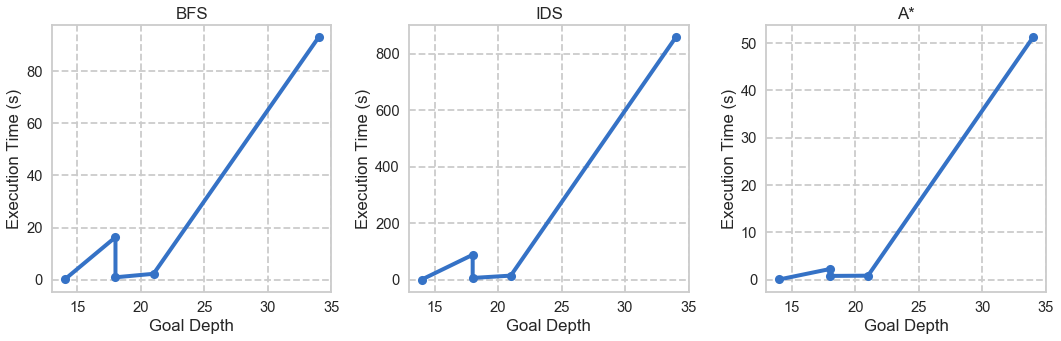

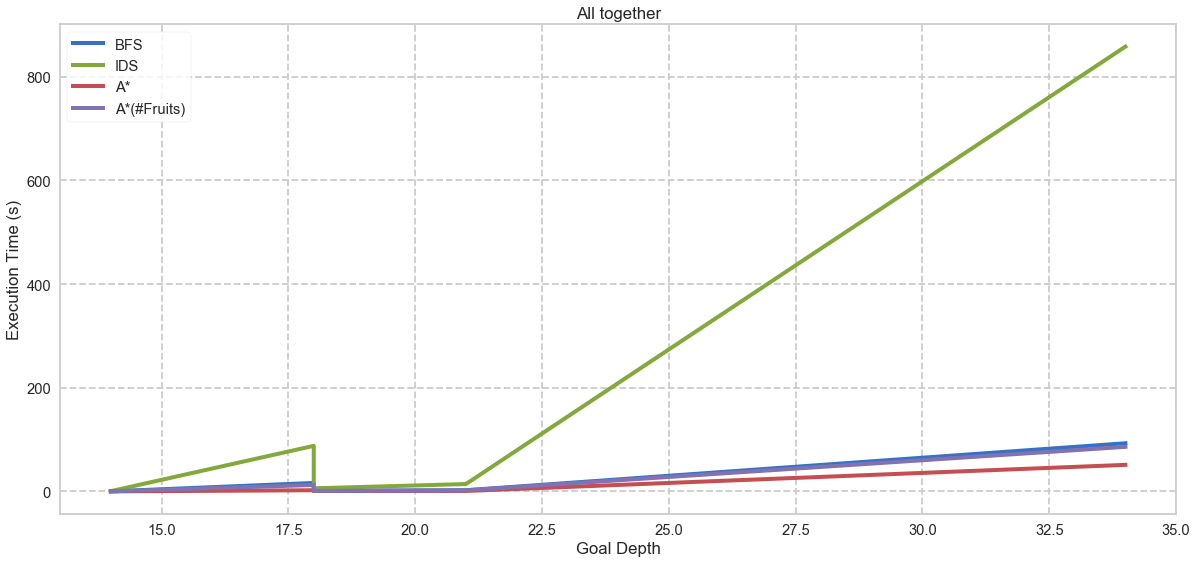

In [33]:
import matplotlib.pyplot as plt

# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style(context='talk', fscale=1.4, spines=True, gridlines='--')
# jtplot.reset()

# 5 - 4 - 2 - 3 - 1
depths = [14, 18, 18, 21, 34]
BFS_times = [0.106, 16.311, 0.944, 2.286, 92.904]
IDS_times = [0.477, 87.921, 5.961, 14.221, 858.272]
A_times = [0.038, 2.245, 0.789, 0.840, 51.218]
A_fruits_times = [0.076, 12.371, 0.967, 2.035, 85.964]
line_width = 4

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(depths, BFS_times, s=10)
plt.plot(depths, BFS_times, '-o', linewidth=line_width)
plt.title("BFS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.subplot(1, 3, 2)
plt.scatter(depths, IDS_times, s=10)
plt.plot(depths, IDS_times, '-o', linewidth=line_width)
plt.title("IDS")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.subplot(1, 3, 3)
plt.scatter(depths, A_times, s=10)
plt.plot(depths, A_times, '-o', linewidth=line_width)
plt.title("A*")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")

plt.tight_layout()        
plt.show()

plt.figure(figsize=(20, 9))
plt.plot(depths, BFS_times, label="BFS", linewidth=line_width)
plt.plot(depths, IDS_times, label="IDS", linewidth=line_width)
plt.plot(depths, A_times, label="A*", linewidth=line_width)
plt.plot(depths, A_fruits_times, label="A*(#Fruits)", linewidth=line_width)
plt.title("All together")
plt.xlabel("Goal Depth")
plt.ylabel("Execution Time (s)")
plt.legend(loc="upper left")
plt.show()